# Coursera Assignment 4: Independent Data Scientist

# Under-five mortality rate in Slovenia (1981 - 2018)

## Region And Domain

Region: Slovenia<br>
Domain: Under-Five Child mortality

## Research Question

I am interested in change of under-five child mortality rate in Slovenia in the period of 1981 - 2018

## Links

https://data.unicef.org/topic/child-survival/under-five-mortality/
<br>
https://data.unicef.org/wp-content/uploads/2018/09/U5MR_deaths_2019.xlsx
<br>
https://childmortality.org/data/Slovenia

## Data source 1: Unicef

In [41]:
import pandas as pd
#I am behind firewall and can't access directly
#U5MR_url = "https://data.unicef.org/wp-content/uploads/2018/09/U5MR_deaths_2019.xlsx"
U5MR_path = "U5MR_deaths_2019.xlsx"
#U5MR = pd.read_excel(U5MR_url, sheet_name  = 0, header = 14)
U5MR = pd.read_excel(U5MR_path, sheet_name  = 0, header = 14)
U5MR = U5MR[(U5MR["CountryName"] == "Slovenia") & (U5MR["Uncertainty bounds*"] == "Median")]
U5MR.drop(["CountryName", "Uncertainty bounds*", "ISO Code"], axis = 1, inplace = True)
U5MR.reset_index(drop = True, inplace = True)
U5MR.dropna(axis = 1, inplace = True)
#y value is under five deaths/1000 live births
#Under-five mortality rate: Probability of dying between birth and exactly 5 years of age, expressed per 1,000 live births.
#rename cols
for col in U5MR.columns:
    #pass
    #print(col, str(col))
    U5MR.rename(columns={col : str(col).split(".")[0]}, inplace = True)
U5MR.drop(["2017"], axis = 1, inplace = True)
U5MR.head()

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,361.0,329.0,298.0,269.0,241.0,216.0,194.0,174.0,157.0,143.0,...,73.0,72.0,70.0,67.0,65.0,62.0,59.0,56.0,53.0,50.0


### Plot DS1

<IPython.core.display.Javascript object>


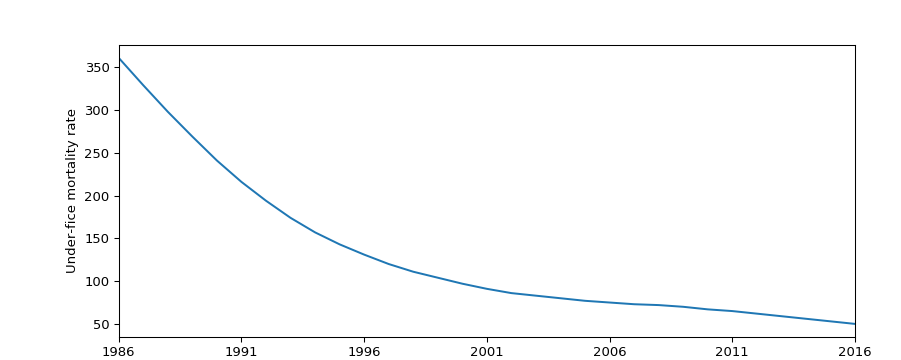

In [89]:
import matplotlib.pyplot as plt
%matplotlib notebook
ax = U5MR.iloc[0].plot.line(figsize=(10,4));
ax.set(xlabel="Year", ylabel="Under-fice mortality rate");

## Data source 2: childmortality.org


In [97]:
import pandas as pd
#I am behind firewall and can't access directly
df2_path = "UNICEF-CME_DF_2019-1.0-download.csv"
df2 = pd.read_csv(df2_path)
df2 = df2[(df2["Observation Status"] == "Normal value")]
keepCols = ["Reference Date", "Observation value", "Lower Bound", "Upper Bound"]
df2 =  df2[keepCols]
df2["Reference Date"] = df2["Reference Date"].apply(lambda year : str(year).split(".")[0])
df2.set_index("Reference Date", inplace = True)
#df = df2.transpose()
df2.head()

,Observation value,Lower Bound,Upper Bound
Reference Date,,,
1981,18.048037,16.732982,19.172245
1982,17.052341,16.198982,17.892782
1983,16.117387,15.520512,16.752820
1984,15.220838,14.732454,15.754106
1985,14.341760,13.898020,14.861647


## Plot DS2

<IPython.core.display.Javascript object>


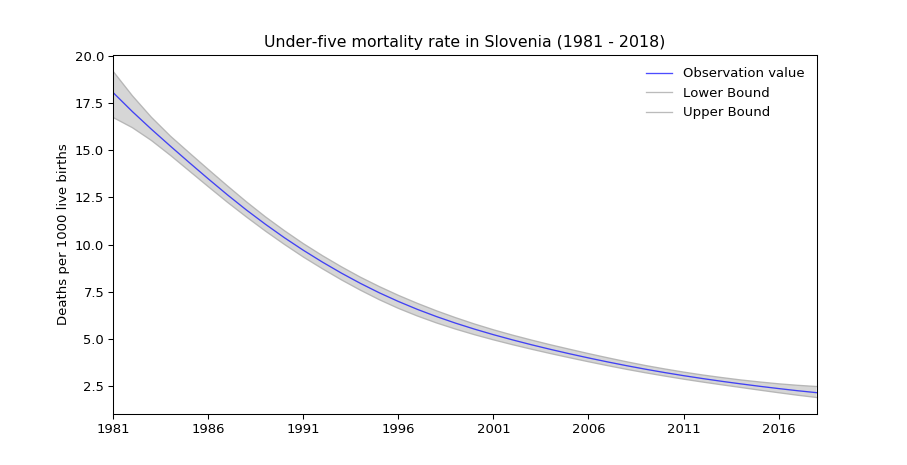

0.0 37.0


In [114]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Under-five mortality rate in Slovenia (1981 - 2018)")
plt.plot(df2.index, df2["Observation value"], "#0000FF", linewidth = 1, alpha=0.7, label = 'Observation value')
plt.plot(df2.index, df2["Lower Bound"], "#AAAAAA", linewidth = 1, alpha=0.8, label = 'Lower Bound')
plt.plot(df2.index, df2["Upper Bound"], "#AAAAAA", linewidth = 1, alpha=0.8, label = 'Upper Bound')
plt.fill_between(df2.index, df2["Lower Bound"], df2["Observation value"], facecolor='#BBBBBB', alpha = 0.6)
plt.fill_between(df2.index, df2["Observation value"], df2["Upper Bound"], facecolor='#BBBBBB', alpha = 0.6)
ax.set_xlim(df2.index[0], df2.index[-1])
ax.set_ylabel('Deaths per 1000 live births')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5));
plt.legend(loc = 1).get_frame().set_edgecolor('white')